# Make your own forcing data from ERA5

Introduction: There are lots of forcing data can be used to drive the model, such as ERA5, NCEP (https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html), etc. Here, we recommend ERA5 to make your own single point forcing as the NCEP and others are too big to download. The ERA5 data can be obtained in a small scale, which usually light weight to download and store.

## Step 1: Download the required variables from the cdsapi

First, we will use the `cdsapi` package to download the data. If you don't have the package installed, you can install it using the following command:

```
pip install cdsapi

cat <<EOF > ~/.cdsapirc
url: {api-url}
key: {uid}:{api-key}
EOF 
```

[How to get your CDS API?](https://cds.climate.copernicus.eu/api-how-to)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
raw_forcing = xr.open_dataset('inputfolder/Urban-PLUMBER/datm_files/UK-Kin/CLM1PT_data/forcing.nc')
raw_forcing = raw_forcing.sel(time=slice('2003', '2004'))
raw_forcing

<xarray.Dataset>
Dimensions:                             (time: 35088, x: 1, y: 1)
Coordinates:
  * time                                (time) datetime64[ns] 2003-01-01 ... ...
  * x                                   (x) int32 1
  * y                                   (y) int32 1
Data variables: (12/50)
    Prectmms                            (time, y, x) float32 ...
    Wind                                (time, y, x) float32 ...
    Zbot                                (time, x, y) float32 ...
    LWdown                              (time, y, x) float32 ...
    LWdown_qc                           (time) int8 ...
    PSurf                               (time, y, x) float32 ...
    ...                                  ...
    topsoil_clay_fraction               (y, x) float32 ...
    topsoil_sand_fraction               (y, x) float32 ...
    tree_area_fraction                  (y, x) float32 ...
    tree_mean_height                    (y, x) float32 ...
    wall_to_plan_area_ratio             (y, x) float32 ...
    water_area_fraction                 (y, x) float32 ...
Attributes: (12/29)
    title:                      Continuous meterological forcing from UK-King...
    summary:                    Flux tower observations from Kings College, L...
    sitename:                   UK-KingsCollege
    long_sitename:              Kings College, London, United Kingdom
    version:                    v1
    keywords:                   urban, flux tower, eddy covariance, observations
    ...                         ...
    source:                     https://github.com/matlipson/urban-plumber_pi...
    other_references:           ERA5: Copernicus Climate Change Service (C3S)...
    acknowledgements:           Contains modified Copernicus Climate Change S...
    comment:                    Observations from KSSW tower
    history:                    Thu May  2 13:18:48 2024: ncap2 -O -s time=lo...
    NCO:                        netCDF Operators version 4.8.1 (Homepage = ht...

In [3]:
if np.datetime64(raw_forcing.time[-1].values) == np.datetime64('2015-12-31T23:30:00'):
    print('Last time step is 23:00')
    

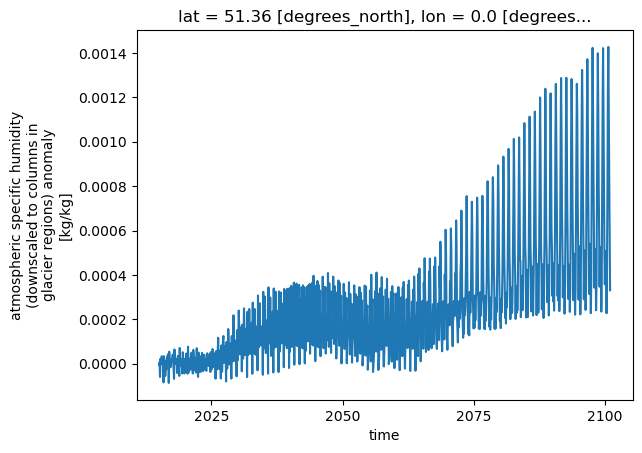

In [8]:
anomaly = xr.open_dataset('/Users/user/Downloads/af.allvars.CESM.SSP3-7.0.2015-2100_c20220628.nc')
anomaly.sel(lat=51.5, lon=0.5, method='nearest').huss.plot()

In [5]:
anomaly

<xarray.Dataset>
Dimensions:   (time: 1032, lat: 192, lon: 288)
Coordinates:
  * time      (time) object 2015-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    landmask  (lat, lon) int32 ...
    area      (lat, lon) float64 ...
    landfrac  (lat, lon) float64 ...
    tas       (time, lat, lon) float64 ...
    pr        (time, lat, lon) float64 ...
    rsds      (time, lat, lon) float64 ...
    rlds      (time, lat, lon) float64 ...
    huss      (time, lat, lon) float64 ...
    ps        (time, lat, lon) float64 ...
    uas       (time, lat, lon) float64 ...
    vas       (time, lat, lon) float64 ...
Attributes: (12/15)
    Created_on:                    2022/06/28
    title:                         anomaly forcing data
    note1:                         Anomaly/scale factors calculated relative ...
    history:                       Tue Jun 28 2022: created by ./ssp_anomaly_...
    gitdescribe:                   branch_tags/ssp_af.n02_ctsm5.1.dev099
    Source:                        CMIP6 CESM simulations
    ...                            ...
    Created_by:                    erik
    Created_from_historical_dirs:  /glade/campaign/collections/cmip/CMIP6/tim...
    Created_from_scenario_dirs:    /glade/campaign/collections/cmip/CMIP6/tim...
    History_years:                 1995,2014
    Scenario_years:                2015,2100
    institution:                   National Center for Atmospheric Research

In [56]:
a = anomaly.sel(lat=51.5, lon=0.5, method='nearest')
a= a.assign_coords(time = a.indexes['time'].to_datetimeindex())
a

/var/folders/0r/sbwms16j3z5c45znn0hsvrl80000gp/T/ipykernel_2550/454876068.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  a= a.assign_coords(time = a.indexes['time'].to_datetimeindex())


<xarray.Dataset>
Dimensions:   (time: 1032)
Coordinates:
    lat       float64 51.36
    lon       float64 0.0
  * time      (time) datetime64[ns] 2015-01-16 2015-02-13 ... 2100-12-16
Data variables:
    landmask  int32 ...
    area      float64 ...
    landfrac  float64 ...
    tas       (time) float64 ...
    pr        (time) float64 ...
    rsds      (time) float64 ...
    rlds      (time) float64 ...
    huss      (time) float64 ...
    ps        (time) float64 ...
    uas       (time) float64 ...
    vas       (time) float64 ...
Attributes: (12/15)
    Created_on:                    2022/06/28
    title:                         anomaly forcing data
    note1:                         Anomaly/scale factors calculated relative ...
    history:                       Tue Jun 28 2022: created by ./ssp_anomaly_...
    gitdescribe:                   branch_tags/ssp_af.n02_ctsm5.1.dev099
    Source:                        CMIP6 CESM simulations
    ...                            ...
    Created_by:                    erik
    Created_from_historical_dirs:  /glade/campaign/collections/cmip/CMIP6/tim...
    Created_from_scenario_dirs:    /glade/campaign/collections/cmip/CMIP6/tim...
    History_years:                 1995,2014
    Scenario_years:                2015,2100
    institution:                   National Center for Atmospheric Research

In [96]:
from typing import Union
from datetime import datetime
var_dict = {'Tair': 'tas', 'Qair': 'huss', 'Wind': 'uas,vas', 
            'SWdown': 'rsds', 'LWdown': 'rlds', 
            'Prectmms': 'pr', 'PSurf': 'ps'}

def get_anomaly_frocing(raw_forcing: Union[xr.Dataset, str],
                        anomaly: Union[xr.Dataset, str],
                        lat : float,
                        lon : float,
                        var_dict : dict,
                        outputname : str) -> xr.Dataset:
    """
    Args:
        era5 (_type_): the era5 dataset, or the path of the era5 dataset
        lat (_type_): latitude of interest point
        lon (_type_): longitude of interest point
        outputname (_type_): the output file name

    Returns:
        _type_: the forcing dataset
    """
    if isinstance(raw_forcing, str):
        forcing = xr.open_dataset(raw_forcing)
    elif isinstance(raw_forcing, xr.Dataset):
        forcing = raw_forcing
    else:
        raise ValueError("The era5 should be a xarray dataset or a file path.")

    if isinstance(anomaly, str):
        anomaly = xr.open_dataset(anomaly)
    elif isinstance(anomaly, xr.Dataset):
        anomaly = anomaly
    else:
        raise ValueError("The anomaly should be a xarray dataset or a file path.")

    anomaly = anomaly.sel(lat=lat, lon=lon, method='nearest')

    # check the forcing date

    forcing_start_year = pd.to_datetime(forcing.time.values[0]).year
    forcing_end_year = pd.to_datetime(forcing.time.values[-1]).year
    #forcing = forcing.resample(time='30T').interpolate('linear')

    while forcing_end_year < anomaly.time.values[-1].year:

        offsetyear = pd.to_datetime(forcing.time.values[-1]).year - pd.to_datetime(forcing.time.values[0]).year
        new_times = pd.to_datetime(forcing['time'].values) + pd.DateOffset(years=offsetyear)
        forcing_ = forcing.copy()
        forcing_['time'] = new_times
        forcing = xr.concat([forcing, forcing_], dim='time')
        forcing_end_year = pd.to_datetime(forcing.time.values[-1]).year
        
    forcing = forcing.sortby('time')
    anomaly = anomaly.resample(time='M').ffill()
    anomaly = anomaly.resample(time='30T').ffill()
    anomaly = anomaly.assign_coords(time = anomaly.indexes['time'].to_datetimeindex())
    
    #print(str(pd.to_datetime(anomaly.time.values[0]).year), str(pd.to_datetime(anomaly.time.values[-1]).year))

    
    forcing = forcing.sel(time=slice(str(pd.to_datetime(anomaly.time.values[0])), 
                                        str(pd.to_datetime(anomaly.time.values[-1]))))

    print(forcing.time.values.shape, anomaly.time.values.shape)

    for var in var_dict:
        if var == 'Wind':
            uas, vas = var_dict[var].split(',')
            forcing[var] = forcing[var] + (anomaly[uas]**2 + anomaly[vas]**2)**0.5
        else:
            forcing[var] = forcing[var] + anomaly[var_dict[var]]
    
    return forcing

In [97]:
ds = get_anomaly_frocing(
    raw_forcing,
    anomaly,
    51.5,
    0.5,
    var_dict,
    'outputfile.nc'
)

/var/folders/0r/sbwms16j3z5c45znn0hsvrl80000gp/T/ipykernel_2550/3521555786.py:57: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  anomaly = anomaly.assign_coords(time = anomaly.indexes['time'].to_datetimeindex())


(3014594,) (1505233,)


ValueError: cannot reindex or align along dimension 'time' because the (pandas) index has duplicate values

In [100]:
ds.sortby('time')

<xarray.Dataset>
Dimensions:   (time: 1505233)
Coordinates:
  * time      (time) object 2015-01-31 00:00:00 ... 2100-12-31 00:00:00
    lat       float64 51.36
    lon       float64 0.0
Data variables:
    landmask  int32 ...
    area      float64 ...
    landfrac  float64 ...
    tas       (time) float64 ...
    pr        (time) float64 ...
    rsds      (time) float64 ...
    rlds      (time) float64 ...
    huss      (time) float64 ...
    ps        (time) float64 ...
    uas       (time) float64 ...
    vas       (time) float64 ...
Attributes: (12/15)
    Created_on:                    2022/06/28
    title:                         anomaly forcing data
    note1:                         Anomaly/scale factors calculated relative ...
    history:                       Tue Jun 28 2022: created by ./ssp_anomaly_...
    gitdescribe:                   branch_tags/ssp_af.n02_ctsm5.1.dev099
    Source:                        CMIP6 CESM simulations
    ...                            ...
    Created_by:                    erik
    Created_from_historical_dirs:  /glade/campaign/collections/cmip/CMIP6/tim...
    Created_from_scenario_dirs:    /glade/campaign/collections/cmip/CMIP6/tim...
    History_years:                 1995,2014
    Scenario_years:                2015,2100
    institution:                   National Center for Atmospheric Research